<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [394]:
# !pip install autogluon
# !pip install --upgrade mxnet

In [395]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [396]:
#metatrader5 file format
df=pd.read_csv('/content/USDJPY_H3_197101040000_202205050900.csv')

In [397]:
print(df.head())
print(df.tail())
df.info()

  <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0  1971.01.04\t00:00:00\t357.730\t357.730\t357.73...                        
1  1971.01.05\t00:00:00\t357.810\t357.810\t357.81...                        
2  1971.01.06\t00:00:00\t357.860\t357.860\t357.86...                        
3  1971.01.07\t00:00:00\t357.870\t357.870\t357.87...                        
4  1971.01.08\t00:00:00\t357.820\t357.820\t357.82...                        
      <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
55599  2022.05.04\t21:00:00\t130.005\t130.390\t128.62...                        
55600  2022.05.05\t00:00:00\t129.055\t129.541\t129.04...                        
55601  2022.05.05\t03:00:00\t129.233\t129.304\t128.75...                        
55602  2022.05.05\t06:00:00\t129.062\t129.425\t129.06...                        
55603  2022.05.05\t09:00:00\t129.354\t129.756\t129.27...                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55

In [398]:
df.columns=['header']

In [399]:
df = df.header.str.split('\t', expand=True)

In [400]:
df.drop([0,1,6,7,8], axis=1,inplace=True)
df = df.astype(float, errors = 'raise')

In [401]:
df.rename(columns={2:'p_o',3:'p_h',4:'p_l',5:'p_c'}, inplace=True)

In [402]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [403]:
#Features

#130 periods ago
df['p_Open_last_period130'] = df['p_o'].shift(130) 
df['p_High_last_period130'] = df['p_h'].shift(130)
df['p_Low_last_period130'] = df['p_l'].shift(130)
df['p_Close_last_period130'] = df['p_c'].shift(130)
#129 periods ago
df['p_Open_last_period129'] = df['p_o'].shift(129) 
df['p_High_last_period129'] = df['p_h'].shift(129)
df['p_Low_last_period129'] = df['p_l'].shift(129)
df['p_Close_last_period129'] = df['p_c'].shift(129)
#128 periods ago
df['p_Open_last_period128'] = df['p_o'].shift(128) 
df['p_High_last_period128'] = df['p_h'].shift(128)
df['p_Low_last_period128'] = df['p_l'].shift(128)
df['p_Close_last_period128'] = df['p_c'].shift(128)
#127 periods ago
df['p_Open_last_period127'] = df['p_o'].shift(127) 
df['p_High_last_period127'] = df['p_h'].shift(127)
df['p_Low_last_period127'] = df['p_l'].shift(127)
df['p_Close_last_period127'] = df['p_c'].shift(127)
#126 periods ago
df['p_Open_last_period126'] = df['p_o'].shift(126) 
df['p_High_last_period126'] = df['p_h'].shift(126)
df['p_Low_last_period126'] = df['p_l'].shift(126)
df['p_Close_last_period126'] = df['p_c'].shift(126)
#125 periods ago
df['p_Open_last_period125'] = df['p_o'].shift(125) 
df['p_High_last_period125'] = df['p_h'].shift(125)
df['p_Low_last_period125'] = df['p_l'].shift(125)
df['p_Close_last_period125'] = df['p_c'].shift(125)
#124 periods ago
df['p_Open_last_period124'] = df['p_o'].shift(124) 
df['p_High_last_period124'] = df['p_h'].shift(124)
df['p_Low_last_period124'] = df['p_l'].shift(124)
df['p_Close_last_period124'] = df['p_c'].shift(124)
#123 periods ago
df['p_Open_last_period123'] = df['p_o'].shift(123) 
df['p_High_last_period123'] = df['p_h'].shift(123)
df['p_Low_last_period123'] = df['p_l'].shift(123)
df['p_Close_last_period123'] = df['p_c'].shift(123)
#122 periods ago
df['p_Open_last_period122'] = df['p_o'].shift(122) 
df['p_High_last_period122'] = df['p_h'].shift(122)
df['p_Low_last_period122'] = df['p_l'].shift(122)
df['p_Close_last_period122'] = df['p_c'].shift(122)
#121 periods ago
df['p_Open_last_period121'] = df['p_o'].shift(121) 
df['p_High_last_period121'] = df['p_h'].shift(21)
df['p_Low_last_period121'] = df['p_l'].shift(121)
df['p_Close_last_period121'] = df['p_c'].shift(121)
#120 periods ago
df['p_Open_last_period120'] = df['p_o'].shift(120) 
df['p_High_last_period120'] = df['p_h'].shift(120)
df['p_Low_last_period120'] = df['p_l'].shift(120)
df['p_Close_last_period120'] = df['p_c'].shift(120)
#119 periods ago
df['p_Open_last_period119'] = df['p_o'].shift(119) 
df['p_High_last_period119'] = df['p_h'].shift(119)
df['p_Low_last_period119'] = df['p_l'].shift(119)
df['p_Close_last_period119'] = df['p_c'].shift(119)
#118 periods ago
df['p_Open_last_period118'] = df['p_o'].shift(118) 
df['p_High_last_period118'] = df['p_h'].shift(118)
df['p_Low_last_period118'] = df['p_l'].shift(118)
df['p_Close_last_period118'] = df['p_c'].shift(118)
#117 periods ago
df['p_Open_last_period117'] = df['p_o'].shift(117) 
df['p_High_last_period117'] = df['p_h'].shift(117)
df['p_Low_last_period117'] = df['p_l'].shift(117)
df['p_Close_last_period117'] = df['p_c'].shift(117)
#116 periods ago
df['p_Open_last_period116'] = df['p_o'].shift(116) 
df['p_High_last_period116'] = df['p_h'].shift(116)
df['p_Low_last_period116'] = df['p_l'].shift(116)
df['p_Close_last_period116'] = df['p_c'].shift(116)
#115 periods ago
df['p_Open_last_period115'] = df['p_o'].shift(115) 
df['p_High_last_period115'] = df['p_h'].shift(115)
df['p_Low_last_period115'] = df['p_l'].shift(115)
df['p_Close_last_period115'] = df['p_c'].shift(115)
#114 periods ago
df['p_Open_last_period114'] = df['p_o'].shift(114) 
df['p_High_last_period114'] = df['p_h'].shift(114)
df['p_Low_last_period1014'] = df['p_l'].shift(114)
df['p_Close_last_period114'] = df['p_c'].shift(114)
#113 periods ago
df['p_Open_last_period113'] = df['p_o'].shift(113) 
df['p_High_last_period113'] = df['p_h'].shift(113)
df['p_Low_last_period113'] = df['p_l'].shift(113)
df['p_Close_last_period113'] = df['p_c'].shift(113)
#112 periods ago
df['p_Open_last_period112'] = df['p_o'].shift(112) 
df['p_High_last_period112'] = df['p_h'].shift(112)
df['p_Low_last_period112'] = df['p_l'].shift(112)
df['p_Close_last_period112'] = df['p_c'].shift(112)
#111 periods ago
df['p_Open_last_period111'] = df['p_o'].shift(111) 
df['p_High_last_period111'] = df['p_h'].shift(111)
df['p_Low_last_period111'] = df['p_l'].shift(111)
df['p_Close_last_period111'] = df['p_c'].shift(111)
#110 periods ago
df['p_Open_last_period110'] = df['p_o'].shift(110) 
df['p_High_last_period110'] = df['p_h'].shift(110)
df['p_Low_last_period110'] = df['p_l'].shift(110)
df['p_Close_last_period110'] = df['p_c'].shift(110)
#109 periods ago
df['p_Open_last_period109'] = df['p_o'].shift(109) 
df['p_High_last_period109'] = df['p_h'].shift(109)
df['p_Low_last_period109'] = df['p_l'].shift(109)
df['p_Close_last_period109'] = df['p_c'].shift(109)
#108 periods ago
df['p_Open_last_period108'] = df['p_o'].shift(108) 
df['p_High_last_period108'] = df['p_h'].shift(108)
df['p_Low_last_period108'] = df['p_l'].shift(108)
df['p_Close_last_period108'] = df['p_c'].shift(108)
#107 periods ago
df['p_Open_last_period107'] = df['p_o'].shift(107) 
df['p_High_last_period107'] = df['p_h'].shift(107)
df['p_Low_last_period107'] = df['p_l'].shift(107)
df['p_Close_last_period107'] = df['p_c'].shift(107)
#106 periods ago
df['p_Open_last_period106'] = df['p_o'].shift(106) 
df['p_High_last_period106'] = df['p_h'].shift(106)
df['p_Low_last_period106'] = df['p_l'].shift(106)
df['p_Close_last_period106'] = df['p_c'].shift(106)
#105 periods ago
df['p_Open_last_period105'] = df['p_o'].shift(105) 
df['p_High_last_period105'] = df['p_h'].shift(105)
df['p_Low_last_period105'] = df['p_l'].shift(105)
df['p_Close_last_period105'] = df['p_c'].shift(105)
#104 periods ago
df['p_Open_last_period104'] = df['p_o'].shift(104) 
df['p_High_last_period104'] = df['p_h'].shift(104)
df['p_Low_last_period104'] = df['p_l'].shift(104)
df['p_Close_last_period104'] = df['p_c'].shift(104)
#103 periods ago
df['p_Open_last_period103'] = df['p_o'].shift(103) 
df['p_High_last_period103'] = df['p_h'].shift(103)
df['p_Low_last_period103'] = df['p_l'].shift(103)
df['p_Close_last_period103'] = df['p_c'].shift(103)
#102 periods ago
df['p_Open_last_period102'] = df['p_o'].shift(102) 
df['p_High_last_period102'] = df['p_h'].shift(102)
df['p_Low_last_period102'] = df['p_l'].shift(102)
df['p_Close_last_period102'] = df['p_c'].shift(102)
#101 periods ago
df['p_Open_last_period101'] = df['p_o'].shift(101) 
df['p_High_last_period101'] = df['p_h'].shift(101)
df['p_Low_last_period101'] = df['p_l'].shift(101)
df['p_Close_last_period101'] = df['p_c'].shift(101)
#100 periods ago
df['p_Open_last_period100'] = df['p_o'].shift(100) 
df['p_High_last_period100'] = df['p_h'].shift(100)
df['p_Low_last_period100'] = df['p_l'].shift(100)
df['p_Close_last_period100'] = df['p_c'].shift(100)
#99 periods ago
df['p_Open_last_period99'] = df['p_o'].shift(99) 
df['p_High_last_period99'] = df['p_h'].shift(99)
df['p_Low_last_period99'] = df['p_l'].shift(99)
df['p_Close_last_period99'] = df['p_c'].shift(99)
#98 periods ago
df['p_Open_last_period98'] = df['p_o'].shift(98) 
df['p_High_last_period98'] = df['p_h'].shift(98)
df['p_Low_last_period98'] = df['p_l'].shift(98)
df['p_Close_last_period98'] = df['p_c'].shift(98)
#97 periods ago
df['p_Open_last_period97'] = df['p_o'].shift(97) 
df['p_High_last_period97'] = df['p_h'].shift(97)
df['p_Low_last_period97'] = df['p_l'].shift(97)
df['p_Close_last_period97'] = df['p_c'].shift(97)
#96 periods ago
df['p_Open_last_period96'] = df['p_o'].shift(96) 
df['p_High_last_period96'] = df['p_h'].shift(96)
df['p_Low_last_period96'] = df['p_l'].shift(96)
df['p_Close_last_period96'] = df['p_c'].shift(96)
#95 periods ago
df['p_Open_last_period95'] = df['p_o'].shift(95) 
df['p_High_last_period95'] = df['p_h'].shift(95)
df['p_Low_last_period95'] = df['p_l'].shift(95)
df['p_Close_last_period95'] = df['p_c'].shift(95)
#94 periods ago
df['p_Open_last_period94'] = df['p_o'].shift(94) 
df['p_High_last_period94'] = df['p_h'].shift(94)
df['p_Low_last_period94'] = df['p_l'].shift(94)
df['p_Close_last_period94'] = df['p_c'].shift(94)
#93 periods ago
df['p_Open_last_period93'] = df['p_o'].shift(93) 
df['p_High_last_period93'] = df['p_h'].shift(93)
df['p_Low_last_period93'] = df['p_l'].shift(93)
df['p_Close_last_period93'] = df['p_c'].shift(93)
#92 periods ago
df['p_Open_last_period92'] = df['p_o'].shift(92) 
df['p_High_last_period92'] = df['p_h'].shift(92)
df['p_Low_last_period92'] = df['p_l'].shift(92)
df['p_Close_last_period92'] = df['p_c'].shift(92)
#91 periods ago
df['p_Open_last_period91'] = df['p_o'].shift(91) 
df['p_High_last_period91'] = df['p_h'].shift(91)
df['p_Low_last_period91'] = df['p_l'].shift(91)
df['p_Close_last_period91'] = df['p_c'].shift(91)
#90 periods ago
df['p_Open_last_period90'] = df['p_o'].shift(90) 
df['p_High_last_period90'] = df['p_h'].shift(90)
df['p_Low_last_period90'] = df['p_l'].shift(90)
df['p_Close_last_period90'] = df['p_c'].shift(90)
#89 periods ago
df['p_Open_last_period89'] = df['p_o'].shift(89) 
df['p_High_last_period89'] = df['p_h'].shift(89)
df['p_Low_last_period89'] = df['p_l'].shift(89)
df['p_Close_last_period89'] = df['p_c'].shift(89)
#88 periods ago
df['p_Open_last_period88'] = df['p_o'].shift(88) 
df['p_High_last_period88'] = df['p_h'].shift(88)
df['p_Low_last_period88'] = df['p_l'].shift(88)
df['p_Close_last_period88'] = df['p_c'].shift(88)
#87 periods ago
df['p_Open_last_period87'] = df['p_o'].shift(87) 
df['p_High_last_period87'] = df['p_h'].shift(87)
df['p_Low_last_period87'] = df['p_l'].shift(87)
df['p_Close_last_period87'] = df['p_c'].shift(87)
#86 periods ago
df['p_Open_last_period86'] = df['p_o'].shift(86) 
df['p_High_last_period86'] = df['p_h'].shift(86)
df['p_Low_last_period86'] = df['p_l'].shift(86)
df['p_Close_last_period86'] = df['p_c'].shift(86)
#85 periods ago
df['p_Open_last_period85'] = df['p_o'].shift(85) 
df['p_High_last_period85'] = df['p_h'].shift(85)
df['p_Low_last_period85'] = df['p_l'].shift(85)
df['p_Close_last_period85'] = df['p_c'].shift(85)
#84 periods ago
df['p_Open_last_period84'] = df['p_o'].shift(84) 
df['p_High_last_period84'] = df['p_h'].shift(84)
df['p_Low_last_period84'] = df['p_l'].shift(84)
df['p_Close_last_period84'] = df['p_c'].shift(84)
#83 periods ago
df['p_Open_last_period83'] = df['p_o'].shift(83) 
df['p_High_last_period83'] = df['p_h'].shift(83)
df['p_Low_last_period83'] = df['p_l'].shift(83)
df['p_Close_last_period83'] = df['p_c'].shift(83)
#82 periods ago
df['p_Open_last_period82'] = df['p_o'].shift(82) 
df['p_High_last_period82'] = df['p_h'].shift(82)
df['p_Low_last_period82'] = df['p_l'].shift(82)
df['p_Close_last_period82'] = df['p_c'].shift(82)
#81 periods ago
df['p_Open_last_period81'] = df['p_o'].shift(81) 
df['p_High_last_period81'] = df['p_h'].shift(81)
df['p_Low_last_period81'] = df['p_l'].shift(81)
df['p_Close_last_period81'] = df['p_c'].shift(81)
#80 periods ago
df['p_Open_last_period80'] = df['p_o'].shift(80) 
df['p_High_last_period80'] = df['p_h'].shift(80)
df['p_Low_last_period80'] = df['p_l'].shift(80)
df['p_Close_last_period80'] = df['p_c'].shift(80)
#79 periods ago
df['p_Open_last_period79'] = df['p_o'].shift(79) 
df['p_High_last_period79'] = df['p_h'].shift(79)
df['p_Low_last_period79'] = df['p_l'].shift(79)
df['p_Close_last_period79'] = df['p_c'].shift(79)
#78 periods ago
df['p_Open_last_period78'] = df['p_o'].shift(78) 
df['p_High_last_period78'] = df['p_h'].shift(78)
df['p_Low_last_period78'] = df['p_l'].shift(78)
df['p_Close_last_period78'] = df['p_c'].shift(78)
#77 periods ago
df['p_Open_last_period77'] = df['p_o'].shift(77) 
df['p_High_last_period77'] = df['p_h'].shift(77)
df['p_Low_last_period77'] = df['p_l'].shift(77)
df['p_Close_last_period77'] = df['p_c'].shift(77)
#76 periods ago
df['p_Open_last_period76'] = df['p_o'].shift(76) 
df['p_High_last_period76'] = df['p_h'].shift(76)
df['p_Low_last_period76'] = df['p_l'].shift(76)
df['p_Close_last_period76'] = df['p_c'].shift(76)
#75 periods ago
df['p_Open_last_period75'] = df['p_o'].shift(75) 
df['p_High_last_period75'] = df['p_h'].shift(75)
df['p_Low_last_period75'] = df['p_l'].shift(75)
df['p_Close_last_period75'] = df['p_c'].shift(75)
#74 periods ago
df['p_Open_last_period74'] = df['p_o'].shift(74) 
df['p_High_last_period74'] = df['p_h'].shift(74)
df['p_Low_last_period74'] = df['p_l'].shift(74)
df['p_Close_last_period74'] = df['p_c'].shift(74)
#73 periods ago
df['p_Open_last_period73'] = df['p_o'].shift(73) 
df['p_High_last_period73'] = df['p_h'].shift(73)
df['p_Low_last_period73'] = df['p_l'].shift(73)
df['p_Close_last_period73'] = df['p_c'].shift(73)
#72 periods ago
df['p_Open_last_period72'] = df['p_o'].shift(72) 
df['p_High_last_period72'] = df['p_h'].shift(72)
df['p_Low_last_period72'] = df['p_l'].shift(72)
df['p_Close_last_period72'] = df['p_c'].shift(72)
#71 periods ago
df['p_Open_last_period71'] = df['p_o'].shift(71) 
df['p_High_last_period71'] = df['p_h'].shift(71)
df['p_Low_last_period71'] = df['p_l'].shift(71)
df['p_Close_last_period71'] = df['p_c'].shift(71)
#70 periods ago
df['p_Open_last_period70'] = df['p_o'].shift(70) 
df['p_High_last_period70'] = df['p_h'].shift(70)
df['p_Low_last_period70'] = df['p_l'].shift(70)
df['p_Close_last_period70'] = df['p_c'].shift(70)
#69 periods ago
df['p_Open_last_period69'] = df['p_o'].shift(69) 
df['p_High_last_period69'] = df['p_h'].shift(69)
df['p_Low_last_period69'] = df['p_l'].shift(69)
df['p_Close_last_period69'] = df['p_c'].shift(69)
#68 periods ago
df['p_Open_last_period68'] = df['p_o'].shift(68) 
df['p_High_last_period68'] = df['p_h'].shift(68)
df['p_Low_last_period68'] = df['p_l'].shift(68)
df['p_Close_last_period68'] = df['p_c'].shift(68)
#67 periods ago
df['p_Open_last_period67'] = df['p_o'].shift(67) 
df['p_High_last_period67'] = df['p_h'].shift(67)
df['p_Low_last_period67'] = df['p_l'].shift(67)
df['p_Close_last_period67'] = df['p_c'].shift(67)
#66 periods ago
df['p_Open_last_period66'] = df['p_o'].shift(66) 
df['p_High_last_period66'] = df['p_h'].shift(66)
df['p_Low_last_period66'] = df['p_l'].shift(66)
df['p_Close_last_period66'] = df['p_c'].shift(66)
#65 periods ago
df['p_Open_last_period65'] = df['p_o'].shift(65) 
df['p_High_last_period65'] = df['p_h'].shift(65)
df['p_Low_last_period65'] = df['p_l'].shift(65)
df['p_Close_last_period65'] = df['p_c'].shift(65)
#64 periods ago
df['p_Open_last_period64'] = df['p_o'].shift(64) 
df['p_High_last_period64'] = df['p_h'].shift(64)
df['p_Low_last_period64'] = df['p_l'].shift(64)
df['p_Close_last_period64'] = df['p_c'].shift(64)
#63 periods ago
df['p_Open_last_period63'] = df['p_o'].shift(63) 
df['p_High_last_period63'] = df['p_h'].shift(63)
df['p_Low_last_period63'] = df['p_l'].shift(63)
df['p_Close_last_period63'] = df['p_c'].shift(63)
#62 periods ago
df['p_Open_last_period62'] = df['p_o'].shift(62) 
df['p_High_last_period62'] = df['p_h'].shift(62)
df['p_Low_last_period62'] = df['p_l'].shift(62)
df['p_Close_last_period62'] = df['p_c'].shift(62)
#61 periods ago
df['p_Open_last_period61'] = df['p_o'].shift(61) 
df['p_High_last_period61'] = df['p_h'].shift(61)
df['p_Low_last_period61'] = df['p_l'].shift(61)
df['p_Close_last_period61'] = df['p_c'].shift(61)
#60 periods ago
df['p_Open_last_period60'] = df['p_o'].shift(60) 
df['p_High_last_period60'] = df['p_h'].shift(60)
df['p_Low_last_period60'] = df['p_l'].shift(60)
df['p_Close_last_period60'] = df['p_c'].shift(60)
#59 periods ago
df['p_Open_last_period59'] = df['p_o'].shift(59) 
df['p_High_last_period59'] = df['p_h'].shift(59)
df['p_Low_last_period59'] = df['p_l'].shift(59)
df['p_Close_last_period59'] = df['p_c'].shift(59)
#58 periods ago
df['p_Open_last_period58'] = df['p_o'].shift(58) 
df['p_High_last_period58'] = df['p_h'].shift(58)
df['p_Low_last_period58'] = df['p_l'].shift(58)
df['p_Close_last_period58'] = df['p_c'].shift(58)
#57 periods ago
df['p_Open_last_period57'] = df['p_o'].shift(57) 
df['p_High_last_period57'] = df['p_h'].shift(57)
df['p_Low_last_period57'] = df['p_l'].shift(57)
df['p_Close_last_period57'] = df['p_c'].shift(57)
#56 periods ago
df['p_Open_last_period56'] = df['p_o'].shift(56) 
df['p_High_last_period56'] = df['p_h'].shift(56)
df['p_Low_last_period56'] = df['p_l'].shift(56)
df['p_Close_last_period56'] = df['p_c'].shift(56)
#55 periods ago
df['p_Open_last_period55'] = df['p_o'].shift(55) 
df['p_High_last_period55'] = df['p_h'].shift(55)
df['p_Low_last_period55'] = df['p_l'].shift(55)
df['p_Close_last_period55'] = df['p_c'].shift(55)
#54 periods ago
df['p_Open_last_period54'] = df['p_o'].shift(54) 
df['p_High_last_period54'] = df['p_h'].shift(54)
df['p_Low_last_period54'] = df['p_l'].shift(54)
df['p_Close_last_period54'] = df['p_c'].shift(54)
#53 periods ago
df['p_Open_last_period53'] = df['p_o'].shift(53) 
df['p_High_last_period53'] = df['p_h'].shift(53)
df['p_Low_last_period53'] = df['p_l'].shift(53)
df['p_Close_last_period53'] = df['p_c'].shift(53)
#52 periods ago
df['p_Open_last_period52'] = df['p_o'].shift(52) 
df['p_High_last_period52'] = df['p_h'].shift(52)
df['p_Low_last_period52'] = df['p_l'].shift(52)
df['p_Close_last_period52'] = df['p_c'].shift(52)
#51 periods ago
df['p_Open_last_period51'] = df['p_o'].shift(51) 
df['p_High_last_period51'] = df['p_h'].shift(51)
df['p_Low_last_period51'] = df['p_l'].shift(51)
df['p_Close_last_period51'] = df['p_c'].shift(51)
#50 periods ago
df['p_Open_last_period50'] = df['p_o'].shift(50) 
df['p_High_last_period50'] = df['p_h'].shift(50)
df['p_Low_last_period50'] = df['p_l'].shift(50)
df['p_Close_last_period50'] = df['p_c'].shift(50)
#49 periods ago
df['p_Open_last_period49'] = df['p_o'].shift(49) 
df['p_High_last_period49'] = df['p_h'].shift(49)
df['p_Low_last_period49'] = df['p_l'].shift(49)
df['p_Close_last_period49'] = df['p_c'].shift(49)
#48 periods ago
df['p_Open_last_period48'] = df['p_o'].shift(48) 
df['p_High_last_period48'] = df['p_h'].shift(48)
df['p_Low_last_period48'] = df['p_l'].shift(48)
df['p_Close_last_period48'] = df['p_c'].shift(48)
#47 periods ago
df['p_Open_last_period47'] = df['p_o'].shift(47) 
df['p_High_last_period47'] = df['p_h'].shift(47)
df['p_Low_last_period47'] = df['p_l'].shift(47)
df['p_Close_last_period47'] = df['p_c'].shift(47)
#46 periods ago
df['p_Open_last_period46'] = df['p_o'].shift(46) 
df['p_High_last_period46'] = df['p_h'].shift(46)
df['p_Low_last_period46'] = df['p_l'].shift(46)
df['p_Close_last_period46'] = df['p_c'].shift(46)
#45 periods ago
df['p_Open_last_period45'] = df['p_o'].shift(45) 
df['p_High_last_period45'] = df['p_h'].shift(45)
df['p_Low_last_period45'] = df['p_l'].shift(45)
df['p_Close_last_period45'] = df['p_c'].shift(45)
#44 periods ago
df['p_Open_last_period44'] = df['p_o'].shift(44) 
df['p_High_last_period44'] = df['p_h'].shift(44)
df['p_Low_last_period44'] = df['p_l'].shift(44)
df['p_Close_last_period44'] = df['p_c'].shift(44)
#43 periods ago
df['p_Open_last_period43'] = df['p_o'].shift(43) 
df['p_High_last_period43'] = df['p_h'].shift(43)
df['p_Low_last_period43'] = df['p_l'].shift(43)
df['p_Close_last_period43'] = df['p_c'].shift(43)
#42 periods ago
df['p_Open_last_period42'] = df['p_o'].shift(42) 
df['p_High_last_period42'] = df['p_h'].shift(42)
df['p_Low_last_period42'] = df['p_l'].shift(42)
df['p_Close_last_period42'] = df['p_c'].shift(42)
#41 periods ago
df['p_Open_last_period41'] = df['p_o'].shift(41) 
df['p_High_last_period41'] = df['p_h'].shift(41)
df['p_Low_last_period41'] = df['p_l'].shift(41)
df['p_Close_last_period41'] = df['p_c'].shift(41)
#40 periods ago
df['p_Open_last_period40'] = df['p_o'].shift(40) 
df['p_High_last_period40'] = df['p_h'].shift(40)
df['p_Low_last_period40'] = df['p_l'].shift(40)
df['p_Close_last_period40'] = df['p_c'].shift(40)
#39 periods ago
df['p_Open_last_period39'] = df['p_o'].shift(39) 
df['p_High_last_period39'] = df['p_h'].shift(39)
df['p_Low_last_period39'] = df['p_l'].shift(39)
df['p_Close_last_period39'] = df['p_c'].shift(39)
#38 periods ago
df['p_Open_last_period38'] = df['p_o'].shift(38) 
df['p_High_last_period38'] = df['p_h'].shift(38)
df['p_Low_last_period38'] = df['p_l'].shift(38)
df['p_Close_last_period38'] = df['p_c'].shift(38)
#37 periods ago
df['p_Open_last_period37'] = df['p_o'].shift(37) 
df['p_High_last_period37'] = df['p_h'].shift(37)
df['p_Low_last_period37'] = df['p_l'].shift(37)
df['p_Close_last_period37'] = df['p_c'].shift(37)
#36 periods ago
df['p_Open_last_period36'] = df['p_o'].shift(36) 
df['p_High_last_period36'] = df['p_h'].shift(36)
df['p_Low_last_period36'] = df['p_l'].shift(36)
df['p_Close_last_period36'] = df['p_c'].shift(36)
#35 periods ago
df['p_Open_last_period35'] = df['p_o'].shift(35) 
df['p_High_last_period35'] = df['p_h'].shift(35)
df['p_Low_last_period35'] = df['p_l'].shift(35)
df['p_Close_last_period35'] = df['p_c'].shift(35)
#34 periods ago
df['p_Open_last_period34'] = df['p_o'].shift(34) 
df['p_High_last_period34'] = df['p_h'].shift(34)
df['p_Low_last_period34'] = df['p_l'].shift(34)
df['p_Close_last_period34'] = df['p_c'].shift(34)
#33 periods ago
df['p_Open_last_period33'] = df['p_o'].shift(33) 
df['p_High_last_period33'] = df['p_h'].shift(33)
df['p_Low_last_period33'] = df['p_l'].shift(33)
df['p_Close_last_period33'] = df['p_c'].shift(33)
#32 periods ago
df['p_Open_last_period32'] = df['p_o'].shift(32) 
df['p_High_last_period32'] = df['p_h'].shift(32)
df['p_Low_last_period32'] = df['p_l'].shift(32)
df['p_Close_last_period32'] = df['p_c'].shift(32)
#31 periods ago
df['p_Open_last_period31'] = df['p_o'].shift(31) 
df['p_High_last_period31'] = df['p_h'].shift(31)
df['p_Low_last_period31'] = df['p_l'].shift(31)
df['p_Close_last_period31'] = df['p_c'].shift(31)
#30 periods ago
df['p_Open_last_period30'] = df['p_o'].shift(30) 
df['p_High_last_period30'] = df['p_h'].shift(30)
df['p_Low_last_period30'] = df['p_l'].shift(30)
df['p_Close_last_period30'] = df['p_c'].shift(30) 
#29 periods ago 
df['p_Open_last_period29'] = df['p_o'].shift(29) 
df['p_High_last_period29'] = df['p_h'].shift(29)
df['p_Low_last_period29'] = df['p_l'].shift(29)
df['p_Close_last_period29'] = df['p_c'].shift(29)
#28 periods ago
df['p_Open_last_period28'] = df['p_o'].shift(28) 
df['p_High_last_period28'] = df['p_h'].shift(28)
df['p_Low_last_period28'] = df['p_l'].shift(28)
df['p_Close_last_period28'] = df['p_c'].shift(28) 
#27 periods ago
df['p_Open_last_period27'] = df['p_o'].shift(27) 
df['p_High_last_period27'] = df['p_h'].shift(27)
df['p_Low_last_period27'] = df['p_l'].shift(27)
df['p_Close_last_period27'] = df['p_c'].shift(27)
#26 periods ago
df['p_Open_last_period26'] = df['p_o'].shift(26) 
df['p_High_last_period26'] = df['p_h'].shift(26)
df['p_Low_last_period26'] = df['p_l'].shift(26)
df['p_Close_last_period26'] = df['p_c'].shift(26)
#25 periods ago
df['p_Open_last_period25'] = df['p_o'].shift(25) 
df['p_High_last_period25'] = df['p_h'].shift(25)
df['p_Low_last_period25'] = df['p_l'].shift(25)
df['p_Close_last_period25'] = df['p_c'].shift(25) 
#24 periods ago 
df['p_Open_last_period24'] = df['p_o'].shift(24) 
df['p_High_last_period24'] = df['p_h'].shift(24)
df['p_Low_last_period24'] = df['p_l'].shift(24)
df['p_Close_last_period24'] = df['p_c'].shift(24) 
#23 periods ago
df['p_Open_last_period23'] = df['p_o'].shift(23) 
df['p_High_last_period23'] = df['p_h'].shift(23)
df['p_Low_last_period23'] = df['p_l'].shift(23)
df['p_Close_last_period23'] = df['p_c'].shift(23) 
#22 periods ago
df['p_Open_last_period22'] = df['p_o'].shift(22) 
df['p_High_last_period22'] = df['p_h'].shift(22)
df['p_Low_last_period22'] = df['p_l'].shift(22)
df['p_Close_last_period22'] = df['p_c'].shift(22) 
#21 periods ago
df['p_Open_last_period21'] = df['p_o'].shift(21) 
df['p_High_last_period21'] = df['p_h'].shift(21)
df['p_Low_last_period21'] = df['p_l'].shift(21)
df['p_Close_last_period21'] = df['p_c'].shift(21)
#20 periods ago
df['p_Open_last_period20'] = df['p_o'].shift(20) 
df['p_High_last_period20'] = df['p_h'].shift(20)
df['p_Low_last_period20'] = df['p_l'].shift(20)
df['p_Close_last_period20'] = df['p_c'].shift(20) 
#19 periods ago 
df['p_Open_last_period19'] = df['p_o'].shift(19) 
df['p_High_last_period19'] = df['p_h'].shift(19)
df['p_Low_last_period19'] = df['p_l'].shift(19)
df['p_Close_last_period19'] = df['p_c'].shift(19)
#18 periods ago
df['p_Open_last_period18'] = df['p_o'].shift(18) 
df['p_High_last_period18'] = df['p_h'].shift(18)
df['p_Low_last_period18'] = df['p_l'].shift(18)
df['p_Close_last_period18'] = df['p_c'].shift(18) 
#17 periods ago
df['p_Open_last_period17'] = df['p_o'].shift(17) 
df['p_High_last_period17'] = df['p_h'].shift(17)
df['p_Low_last_period17'] = df['p_l'].shift(17)
df['p_Close_last_period17'] = df['p_c'].shift(17) 
#16 periods ago
df['p_Open_last_period16'] = df['p_o'].shift(16) 
df['p_High_last_period16'] = df['p_h'].shift(16)
df['p_Low_last_period16'] = df['p_l'].shift(16)
df['p_Close_last_period16'] = df['p_c'].shift(16)
#15 periods ago
df['p_Open_last_period15'] = df['p_o'].shift(15) 
df['p_High_last_period15'] = df['p_h'].shift(15)
df['p_Low_last_period15'] = df['p_l'].shift(15)
df['p_Close_last_period15'] = df['p_c'].shift(15)
#14 periods ago 
df['p_Open_last_period14'] = df['p_o'].shift(14) 
df['p_High_last_period14'] = df['p_h'].shift(14)
df['p_Low_last_period14'] = df['p_l'].shift(14)
df['p_Close_last_period14'] = df['p_c'].shift(14) 
#13 periods ago
df['p_Open_last_period13'] = df['p_o'].shift(13) 
df['p_High_last_period13'] = df['p_h'].shift(13)
df['p_Low_last_period13'] = df['p_l'].shift(13)
df['p_Close_last_period13'] = df['p_c'].shift(13) 
#12 periods ago
df['p_Open_last_period12'] = df['p_o'].shift(12) 
df['p_High_last_period12'] = df['p_h'].shift(12)
df['p_Low_last_period12'] = df['p_l'].shift(12)
df['p_Close_last_period12'] = df['p_c'].shift(12) 
#11 periods ago 
df['p_Open_last_period11'] = df['p_o'].shift(11) 
df['p_High_last_period11'] = df['p_h'].shift(11)
df['p_Low_last_period11'] = df['p_l'].shift(11)
df['p_Close_last_period11'] = df['p_c'].shift(11) 
#10 periods ago
df['p_Open_last_period10'] = df['p_o'].shift(10) 
df['p_High_last_period10'] = df['p_h'].shift(10)
df['p_Low_last_period10'] = df['p_l'].shift(10)
df['p_Close_last_period10'] = df['p_c'].shift(10)
#9 periods ago 
df['p_Open_last_period9'] = df['p_o'].shift(9) 
df['p_High_last_period9'] = df['p_h'].shift(9)
df['p_Low_last_period9'] = df['p_l'].shift(9)
df['p_Close_last_period9'] = df['p_c'].shift(9) 
#8 periods ago
df['p_Open_last_period8'] = df['p_o'].shift(8) 
df['p_High_last_period8'] = df['p_h'].shift(8)
df['p_Low_last_period8'] = df['p_l'].shift(8)
df['p_Close_last_period8'] = df['p_c'].shift(8)
#7 periods ago
df['p_Open_last_period7'] = df['p_o'].shift(7) 
df['p_High_last_period7'] = df['p_h'].shift(7)
df['p_Low_last_period7'] = df['p_l'].shift(7)
df['p_Close_last_period7'] = df['p_c'].shift(7) 
#6 periods ago 
df['p_Open_last_period6'] = df['p_o'].shift(6) 
df['p_High_last_period6'] = df['p_h'].shift(6)
df['p_Low_last_period6'] = df['p_l'].shift(6)
df['p_Close_last_period6'] = df['p_c'].shift(6)
#5 periods ago
df['p_Open_last_period5'] = df['p_o'].shift(5) 
df['p_High_last_period5'] = df['p_h'].shift(5)
df['p_Low_last_period5'] = df['p_l'].shift(5)
df['p_Close_last_period5'] = df['p_c'].shift(5) 
#4 periods ago 
df['p_Open_last_period4'] = df['p_o'].shift(4) 
df['p_High_last_period4'] = df['p_h'].shift(4)
df['p_Low_last_period4'] = df['p_l'].shift(4)
df['p_Close_last_period4'] = df['p_c'].shift(4) 
#3 periods ago
df['p_Open_last_period3'] = df['p_o'].shift(3) 
df['p_High_last_period3'] = df['p_h'].shift(3)
df['p_Low_last_period3'] = df['p_l'].shift(3)
df['p_Close_last_period3'] = df['p_c'].shift(3)
#2 periods ago
df['p_Open_last_period2'] = df['p_o'].shift(2) 
df['p_High_last_period2'] = df['p_h'].shift(2)
df['p_Low_last_period2'] = df['p_l'].shift(2)
df['p_Close_last_period2'] = df['p_c'].shift(2) 
#1 periods ago 
df['p_Open_last_period1'] = df['p_o'].shift(1)     
df['p_High_last_period1'] = df['p_h'].shift(1)
df['p_Low_last_period1'] = df['p_l'].shift(1)
df['p_Close_last_period1'] = df['p_c'].shift(1)       


#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [421]:
df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [422]:
df_pre

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
130,357.460,357.460,357.460,357.460,357.410
131,357.400,357.400,357.400,357.400,357.440
132,357.410,357.410,357.410,357.410,357.400
133,357.440,357.440,357.440,357.440,357.400
134,357.400,357.400,357.400,357.400,357.400
...,...,...,...,...,...
55598,129.946,130.132,129.787,129.999,129.081
55599,130.000,130.125,129.883,130.004,129.229
55600,130.005,130.390,128.623,129.081,129.061
55601,129.055,129.541,129.044,129.229,129.356


In [406]:
df

,p_Open_last_period130,p_High_last_period130,p_Low_last_period130,p_Close_last_period130,p_Open_last_period129,p_High_last_period129,p_Low_last_period129,p_Close_last_period129,p_Open_last_period128,p_High_last_period128,...,p_High_last_period2,p_Low_last_period2,p_Close_last_period2,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
130,357.730,357.730,357.730,357.730,357.810,357.810,357.810,357.810,357.860,357.860,...,357.460,357.460,357.460,357.460,357.460,357.460,357.460,357.410,357.410,357.410
131,357.810,357.810,357.810,357.810,357.860,357.860,357.860,357.860,357.870,357.870,...,357.460,357.460,357.460,357.400,357.400,357.400,357.400,357.440,357.440,357.440
132,357.860,357.860,357.860,357.860,357.870,357.870,357.870,357.870,357.820,357.820,...,357.400,357.400,357.400,357.410,357.410,357.410,357.410,357.400,357.400,357.400
133,357.870,357.870,357.870,357.870,357.820,357.820,357.820,357.820,357.950,357.950,...,357.410,357.410,357.410,357.440,357.440,357.440,357.440,357.400,357.400,357.400
134,357.820,357.820,357.820,357.820,357.950,357.950,357.950,357.950,358.060,358.060,...,357.440,357.440,357.440,357.400,357.400,357.400,357.400,357.400,357.400,357.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55598,125.632,125.716,125.475,125.477,125.476,125.600,124.763,125.174,125.179,125.325,...,130.097,129.892,129.943,129.946,130.132,129.787,129.999,130.390,128.623,129.081
55599,125.476,125.600,124.763,125.174,125.179,125.325,125.050,125.234,125.234,125.401,...,130.132,129.787,129.999,130.000,130.125,129.883,130.004,129.541,129.044,129.229
55600,125.179,125.325,125.050,125.234,125.234,125.401,125.215,125.368,125.348,125.496,...,130.125,129.883,130.004,130.005,130.390,128.623,129.081,129.304,128.753,129.061
55601,125.234,125.401,125.215,125.368,125.348,125.496,125.321,125.427,125.426,125.650,...,130.390,128.623,129.081,129.055,129.541,129.044,129.229,129.425,129.061,129.356


In [423]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df_pre.iloc[:-20,:])
df_test_close = pd.DataFrame(data=df_pre.iloc[-20:,:])

#df_train_close = pd.DataFrame(data=df.iloc[0:1980,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[1980:2001,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

       p_Open_last_period1  p_High_last_period1  p_Low_last_period1  \
130                357.460              357.460             357.460   
131                357.400              357.400             357.400   
132                357.410              357.410             357.410   
133                357.440              357.440             357.440   
134                357.400              357.400             357.400   
...                    ...                  ...                 ...   
55578              129.998              130.236             129.612   
55579              130.146              130.430             130.122   
55580              130.408              130.478             129.917   
55581              130.046              130.116             129.823   
55582              129.896              130.243             129.697   

       p_Close_last_period1  p_Close_next_period1  
130                 357.460               357.410  
131                 357.400               3

In [424]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Open_last_period1     0
p_High_last_period1     0
p_Low_last_period1      0
p_Close_last_period1    0
p_Close_next_period1    0
dtype: int64
p_Open_last_period1     0
p_High_last_period1     0
p_Low_last_period1      0
p_Close_last_period1    0
p_Close_next_period1    0
dtype: int64


In [425]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55453 entries, 130 to 55582
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p_Open_last_period1   55453 non-null  float64
 1   p_High_last_period1   55453 non-null  float64
 2   p_Low_last_period1    55453 non-null  float64
 3   p_Close_last_period1  55453 non-null  float64
 4   p_Close_next_period1  55453 non-null  float64
dtypes: float64(5)
memory usage: 2.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 55583 to 55602
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p_Open_last_period1   20 non-null     float64
 1   p_High_last_period1   20 non-null     float64
 2   p_Low_last_period1    20 non-null     float64
 3   p_Close_last_period1  20 non-null     float64
 4   p_Close_next_period1  20 non-null     float64
dtypes: float64(5)
mem

In [426]:
train_close = df_train_close
train_close=train_close.sample(frac=.8, replace=True)
train_close.head()

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
31773,80.818,80.826,80.64,80.797,81.056
31013,89.506,89.633,89.41,89.563,89.451
916,302.110,302.110,302.11,302.110,299.580
4634,132.000,132.250,131.55,132.200,132.500
21187,112.380,112.500,112.29,112.310,112.380


In [427]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    44362.000000
mean       118.687221
std         40.723677
min         75.696000
25%        103.870000
50%        110.217500
75%        119.110000
max        357.440000
Name: p_Close_next_period1, dtype: float64


In [428]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [429]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19912 entries, 31013 to 1182
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p_Open_last_period1   19912 non-null  float64
 1   p_High_last_period1   19912 non-null  float64
 2   p_Low_last_period1    19912 non-null  float64
 3   p_Close_last_period1  19912 non-null  float64
 4   p_Close_next_period1  19912 non-null  float64
dtypes: float64(5)
memory usage: 933.4 KB


In [450]:
#predict close
save_path='agModels-predictClose'
predictor = TabularPredictor(label=label_c, path=save_path)
predictor.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    19912
Train Data Columns: 4
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (357.44, 75.696, 117.66024, 39.03591)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9099.88 MB
	Train Data (Original)  Memory Usage: 0.64 MB (0.0% of available memory)
	Inferring data type of each feature based on 

In [442]:
#contrast leaderboard result of train and test data
predictor.leaderboard(train_close, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LinearModel_BAG_L2,-24.663571,-24.688835,0.642141,0.251572,23.351827,0.342844,0.130131,11.194220,2,True,3
1,WeightedEnsemble_L3,-24.663571,-24.688835,0.644706,0.252815,23.358132,0.002565,0.001242,0.006304,3,True,4
2,LinearModel_BAG_L1,-24.735970,-24.736488,0.299297,0.121441,12.157607,0.299297,0.121441,12.157607,1,True,1
3,WeightedEnsemble_L2,-24.735970,-24.736488,0.302362,0.134264,12.163378,0.003066,0.012822,0.005771,2,True,2


In [443]:
#predict close
test_close = TabularDataset(df_test_close)
y_test = test_close[label_c]
test_close_nolab = test_close.drop(columns=[label_c])
test_close_nolab.tail()

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1
55598,129.946,130.132,129.787,129.999
55599,130.000,130.125,129.883,130.004
55600,130.005,130.390,128.623,129.081
55601,129.055,129.541,129.044,129.229
55602,129.233,129.304,128.753,129.061


In [444]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_close_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -26.066191927055225
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -26.066191927055225,
    "mean_squared_error": -679.446361578079,
    "mean_absolute_error": -26.06430227661133,
    "r2": -5277.801058780966,
    "pearsonr": 0.5196261919207611,
    "median_absolute_error": -25.931721435546876
}


Predictions: 
 55583    156.022980
55584    156.013504
55585    155.990631
55586    155.963852
55587    155.989578
55588    155.994263
55589    155.933777
55590    155.924728
55591    155.969879
55592    155.990158
55593    155.996216
55594    155.983063
55595    155.993301
55596    155.978271
55597    155.933380
55598    155.943909
55599    155.946457
55600    155.780930
55601    155.588165
55602    155.619003
Name: p_Close_next_period1, dtype: float32


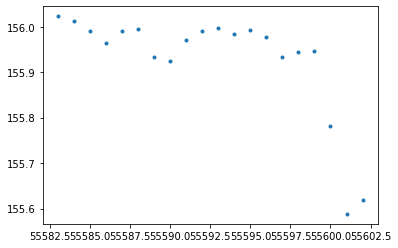

In [445]:
predicted = y_pred.plot(style='.')

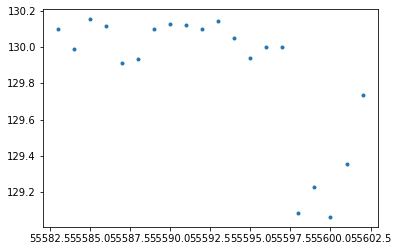

In [446]:
# chart = pd.DataFrame({y_test, y_pred})
# lines = chart.plot.line()
actual = y_test.plot(style='.')

In [420]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf AutogluonModels, ag_predict_interval
!ls

agModels-predictClose
GBPAUD_H12_200708211200_202205061200.csv
sample_data
USDJPY_H3_197101040000_202205050900.csv
